This page provides a brief introduction about using geopandas to conduct spatial analysis...

For more information, please check: [geopandas introduction](https://geopandas.org/getting_started/introduction.html)

Firstly, load the packages...

In [1]:
import pandas as pd
import os
import sys

# For spatial analysis
import geopandas

# For visualization
from matplotlib import pyplot as plt

In [2]:
print("The version of geopandas I use is: {}".format(geopandas.__version__))

The version of geopandas I use is: 0.9.0


# 1. Load the data

In this tutorial, we use the shapefile of Hong Kong as a case study.

In [3]:
shapefile_path = r'D:\Projects\Hong Kong Tweets Combined\shapefiles'

In [4]:
gdf = geopandas.read_file(os.path.join(shapefile_path, 'hk_tpu_project.shp'))
gdf

,FID_1,merge_Nums,SmallTPU,Area,X,Y,geometry
0,0,1.0,121 & 122,5.096523e+05,834108.906504,816193.536025,"POLYGON ((833855.500 816730.490, 833852.070 81..."
1,1,2.0,123 & 124,1.093609e+06,834801.541761,815716.124658,"POLYGON ((834664.492 816415.378, 834710.125 81..."
2,2,3.0,146 & 147,6.480596e+05,837291.995943,815794.951399,"POLYGON ((837536.146 816437.751, 837536.631 81..."
3,3,4.0,156 & 158,6.711841e+06,839940.770162,814559.406871,"POLYGON ((839426.031 816282.149, 839426.091 81..."
4,4,5.0,164 & 165,2.235540e+06,842128.379729,813827.775535,"POLYGON ((841744.812 815060.750, 841752.000 81..."
...,...,...,...,...,...,...,...
204,204,920.0,920,2.437819e+06,821024.573778,807756.050966,"POLYGON ((821580.657 809417.965, 821582.109 80..."
205,205,944.0,944,2.300916e+06,803957.467410,812686.284532,"MULTIPOLYGON (((803409.282 812228.264, 803408...."
206,206,963.0,963,2.461094e+06,822332.212219,812801.081229,"MULTIPOLYGON (((821446.745 813339.295, 821448...."
207,207,975.0,975,1.027243e+06,824281.880051,823330.037885,"MULTIPOLYGON (((824474.230 822476.004, 824475...."


Write to local...

```Python
gdf.to_file("my_file.geojson")
gdf.to_file("my_file.shp")
```

Check the coordinate system...

The distance is measured in meter.

In [5]:
gdf.crs

<Projected CRS: EPSG:2326>
Name: Hong Kong 1980 Grid System
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: China - Hong Kong - onshore and offshore.
- bounds: (113.76, 22.13, 114.51, 22.58)
Coordinate Operation:
- name: Hong Kong 1980 Grid
- method: Transverse Mercator
Datum: Hong Kong 1980
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

In [6]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID_1       209 non-null    int64   
 1   merge_Nums  209 non-null    float64 
 2   SmallTPU    209 non-null    object  
 3   Area        209 non-null    float64 
 4   X           209 non-null    float64 
 5   Y           209 non-null    float64 
 6   geometry    209 non-null    geometry
dtypes: float64(4), geometry(1), int64(1), object(1)
memory usage: 11.6+ KB


# 2. Basic Operations

The following basic operations are presented:

- Measuring area
- Getting the polygon boundary and centroid
- Measuring distance

Let's start with measuring the area...

In [7]:
# In this case, use the TPU name as the index
gdf = gdf.set_index("SmallTPU")
gdf

,FID_1,merge_Nums,Area,X,Y,geometry
SmallTPU,,,,,,
121 & 122,0,1.0,5.096523e+05,834108.906504,816193.536025,"POLYGON ((833855.500 816730.490, 833852.070 81..."
123 & 124,1,2.0,1.093609e+06,834801.541761,815716.124658,"POLYGON ((834664.492 816415.378, 834710.125 81..."
146 & 147,2,3.0,6.480596e+05,837291.995943,815794.951399,"POLYGON ((837536.146 816437.751, 837536.631 81..."
156 & 158,3,4.0,6.711841e+06,839940.770162,814559.406871,"POLYGON ((839426.031 816282.149, 839426.091 81..."
164 & 165,4,5.0,2.235540e+06,842128.379729,813827.775535,"POLYGON ((841744.812 815060.750, 841752.000 81..."
...,...,...,...,...,...,...
920,204,920.0,2.437819e+06,821024.573778,807756.050966,"POLYGON ((821580.657 809417.965, 821582.109 80..."
944,205,944.0,2.300916e+06,803957.467410,812686.284532,"MULTIPOLYGON (((803409.282 812228.264, 803408...."
963,206,963.0,2.461094e+06,822332.212219,812801.081229,"MULTIPOLYGON (((821446.745 813339.295, 821448...."


Get the area of each TPU in Hong Kong, in $m^{2}$

In [8]:
gdf['Area'] = gdf.area

In [9]:
gdf

,FID_1,merge_Nums,Area,X,Y,geometry
SmallTPU,,,,,,
121 & 122,0,1.0,5.096523e+05,834108.906504,816193.536025,"POLYGON ((833855.500 816730.490, 833852.070 81..."
123 & 124,1,2.0,1.093609e+06,834801.541761,815716.124658,"POLYGON ((834664.492 816415.378, 834710.125 81..."
146 & 147,2,3.0,6.480596e+05,837291.995943,815794.951399,"POLYGON ((837536.146 816437.751, 837536.631 81..."
156 & 158,3,4.0,6.711841e+06,839940.770162,814559.406871,"POLYGON ((839426.031 816282.149, 839426.091 81..."
164 & 165,4,5.0,2.235540e+06,842128.379729,813827.775535,"POLYGON ((841744.812 815060.750, 841752.000 81..."
...,...,...,...,...,...,...
920,204,920.0,2.437819e+06,821024.573778,807756.050966,"POLYGON ((821580.657 809417.965, 821582.109 80..."
944,205,944.0,2.300916e+06,803957.467410,812686.284532,"MULTIPOLYGON (((803409.282 812228.264, 803408...."
963,206,963.0,2.461094e+06,822332.212219,812801.081229,"MULTIPOLYGON (((821446.745 813339.295, 821448...."


Moving on to getting the polygon boundary and centroid...

In [10]:
gdf['boundary'] = gdf.boundary
gdf['boundary']

SmallTPU
121 & 122    LINESTRING (833855.500 816730.490, 833852.070 ...
123 & 124    LINESTRING (834664.492 816415.378, 834710.125 ...
146 & 147    LINESTRING (837536.146 816437.751, 837536.631 ...
156 & 158    LINESTRING (839426.031 816282.149, 839426.091 ...
164 & 165    LINESTRING (841744.812 815060.750, 841752.000 ...
                                   ...                        
920          LINESTRING (821580.657 809417.965, 821582.109 ...
944          MULTILINESTRING ((803409.282 812228.264, 80340...
963          MULTILINESTRING ((821446.745 813339.295, 82144...
975          MULTILINESTRING ((824474.230 822476.004, 82447...
976          MULTILINESTRING ((823067.407 816103.167, 82306...
Name: boundary, Length: 209, dtype: geometry

In [11]:
gdf['centroid'] = gdf.centroid
gdf['centroid']

SmallTPU
121 & 122    POINT (834108.907 816193.536)
123 & 124    POINT (834801.542 815716.125)
146 & 147    POINT (837291.996 815794.951)
156 & 158    POINT (839940.770 814559.407)
164 & 165    POINT (842128.380 813827.776)
                         ...              
920          POINT (821024.574 807756.051)
944          POINT (803957.467 812686.285)
963          POINT (822332.212 812801.081)
975          POINT (824281.880 823330.038)
976          POINT (822265.324 816335.436)
Name: centroid, Length: 209, dtype: geometry

Measuring the distance between the first centriod and the others

In [12]:
first_centroid = gdf['centroid'].iloc[0]
gdf['distance'] = gdf['centroid'].distance(first_centroid)
gdf['distance']

SmallTPU
121 & 122        0.000000
123 & 124      841.228394
146 & 147     3207.947643
156 & 158     6056.485104
164 & 165     8361.146662
                 ...     
920          15568.908665
944          30354.737563
963          12255.581497
975          12144.962236
976          11844.432303
Name: distance, Length: 209, dtype: float64

# 3. Active Geometry in Geopandas

In geopandas, we can have multiple types of geometry in the geodataframe. You can set the active geometry by using the **set_geometry** method.

Firstly, let us check the current active geometry

In [13]:
gdf.geometry

SmallTPU
121 & 122    POLYGON ((833855.500 816730.490, 833852.070 81...
123 & 124    POLYGON ((834664.492 816415.378, 834710.125 81...
146 & 147    POLYGON ((837536.146 816437.751, 837536.631 81...
156 & 158    POLYGON ((839426.031 816282.149, 839426.091 81...
164 & 165    POLYGON ((841744.812 815060.750, 841752.000 81...
                                   ...                        
920          POLYGON ((821580.657 809417.965, 821582.109 80...
944          MULTIPOLYGON (((803409.282 812228.264, 803408....
963          MULTIPOLYGON (((821446.745 813339.295, 821448....
975          MULTIPOLYGON (((824474.230 822476.004, 824475....
976          MULTIPOLYGON (((823067.407 816103.167, 823067....
Name: geometry, Length: 209, dtype: geometry

We plot the "Area" we measured earlier using the active geometry column. We also want to show a legend (legend=True).

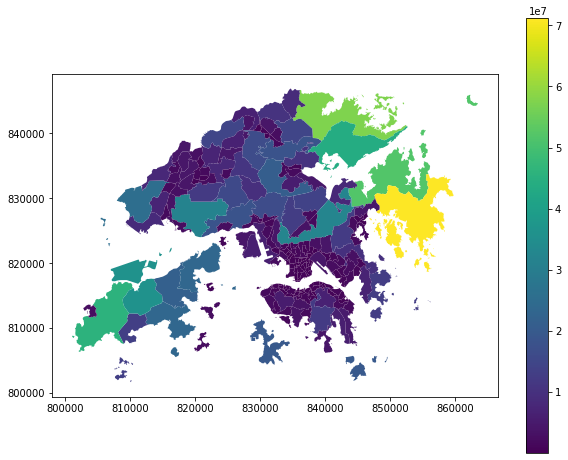

In [14]:
# Plot the data
figure1, axis1 = plt.subplots(1, 1, figsize=(10, 8))
gdf.plot('Area', legend=True, ax=axis1)
plt.show()

By switching the geometry, we can only plot the centroid of those TPUs...

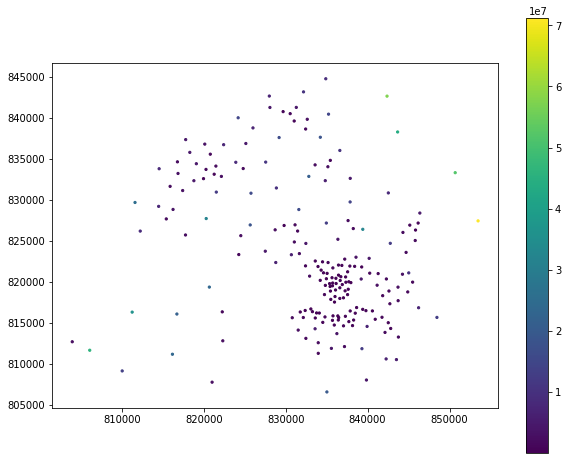

In [15]:
gdf = gdf.set_geometry("centroid") # Choose the "centroid" as the main geometry

fig2, axis2 = plt.subplots(1, 1, figsize=(10, 8))
gdf.plot("Area", legend=True, ax=axis2, markersize=5)
plt.show()

Finally, we can also consider two geometries simultaneously...

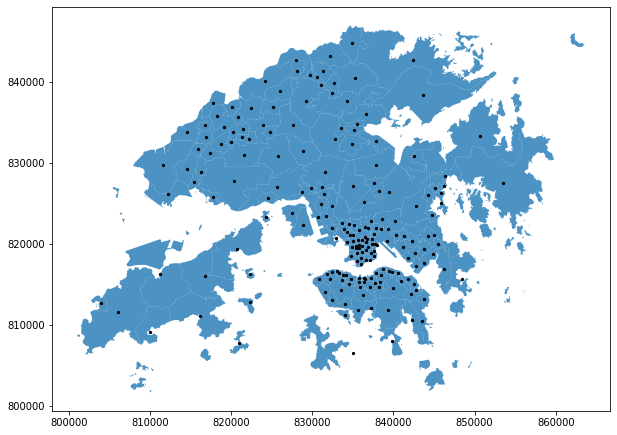

In [16]:
fig3, axis3 = plt.subplots(1, 1, figsize=(10, 8))
gdf["geometry"].plot(ax=axis3, alpha=0.8)
gdf["centroid"].plot(ax=axis3, color="black", markersize=5)
plt.show()

Set the geometry back to "geometry"

In [17]:
gdf = gdf.set_geometry("geometry")

# 4. Geometry Creation

We can further work with the shapefile by creating new shapes:

- Convex Hull
- Buffer

First, let us create a convex hull based on the shapefile

In [18]:
gdf["convex_hull"] = gdf.convex_hull

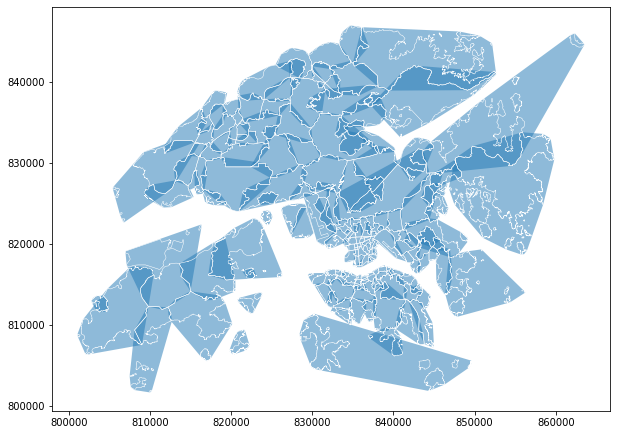

In [19]:
fig4, axis4 = plt.subplots(1, 1, figsize=(10, 8))
gdf['convex_hull'].plot(ax=axis4, alpha=0.5)
gdf['boundary'].plot(ax=axis4, color='white', linewidth=0.5)
plt.show()

Buffer Analysis: Let’s buffer the boroughs and their centroids and plot both on top of each other.

In [20]:
# buffering the active geometry by 500 meter (geometry is already in meter)
gdf["buffered"] = gdf.buffer(500)

# buffering the centroid geometry by 10 000 feet (geometry is already in meter)
gdf["buffered_centroid"] = gdf["centroid"].buffer(500)

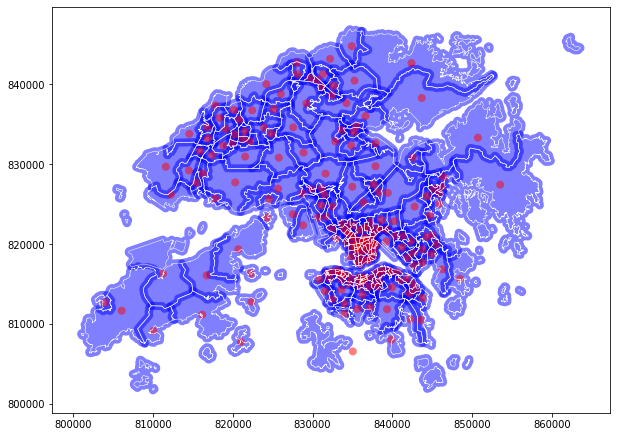

In [21]:
fig5, axis5 = plt.subplots(1, 1, figsize=(10, 8))
gdf["buffered"].plot(ax=axis5, alpha=.5, color='blue')
gdf["buffered_centroid"].plot(ax=axis5, color="red", alpha=.5)  # passing the first plot as an axis to the second
gdf["boundary"].plot(ax=axis5, color="white", linewidth=.5)  # passing the first plot and setting linewitdth to 0.5
plt.show()

# 5. Geometry Relations

Check the spatial relationships of two polygons.

- Check whether two polygons intersect or not
- Check whether the buffered centroids are entirely within the original boroughs polygons

Firstly, create a shapefile for the Hong Kong TPU 121 & 122...

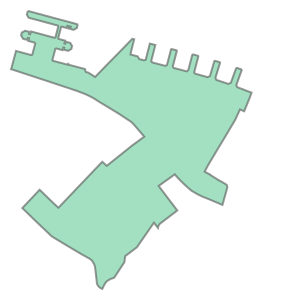

In [22]:
tpu_121_122 = gdf.loc['121 & 122', 'geometry']
tpu_121_122

In [23]:
print(type(tpu_121_122))

<class 'shapely.geometry.polygon.Polygon'>


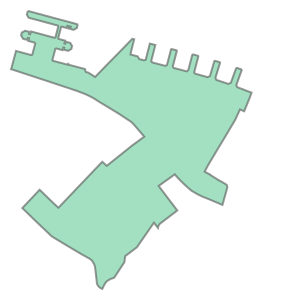

In [24]:
tpu_121_122

In [25]:
tpu_121_122_geodataframe = geopandas.GeoDataFrame(columns=['geometry'])
tpu_121_122_geodataframe['geometry'] = [tpu_121_122]

In [26]:
tpu_121_122_geodataframe

,geometry
0,"POLYGON ((833855.500 816730.490, 833852.070 81..."


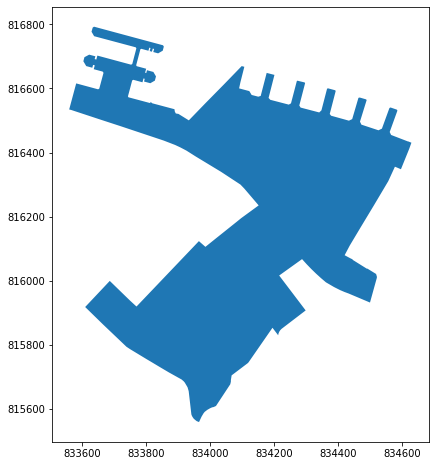

In [27]:
fig_121_122, axis_121_122 = plt.subplots(1, 1, figsize=(10, 8))
tpu_121_122_geodataframe.plot(ax = axis_121_122)
plt.show()

Check whether the studied TPU unit intersect with other boroughs...

In [28]:
gdf["buffered"].intersects(tpu_121_122)

SmallTPU
121 & 122     True
123 & 124     True
146 & 147    False
156 & 158    False
164 & 165    False
             ...  
920          False
944          False
963          False
975          False
976          False
Length: 209, dtype: bool

Check whether the buffered centroids are entirely within the original boroughs polygons...

In [29]:
gdf["within"] = gdf["buffered_centroid"].within(gdf)
gdf["within"]

SmallTPU
121 & 122    False
123 & 124    False
146 & 147    False
156 & 158     True
164 & 165    False
             ...  
920          False
944          False
963          False
975          False
976          False
Name: within, Length: 209, dtype: bool

<AxesSubplot:>

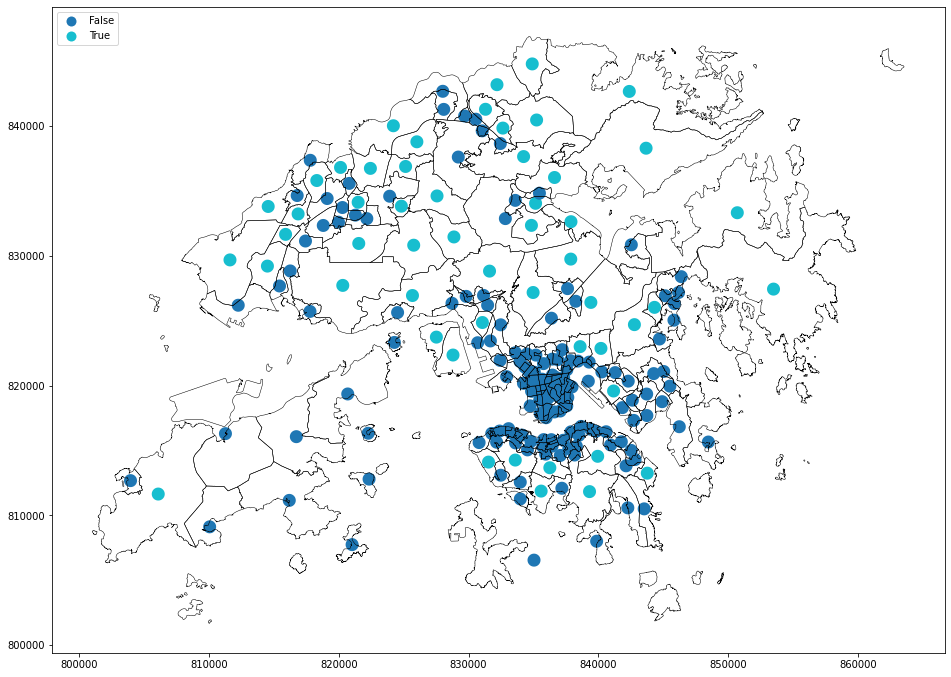

In [30]:
figure_buffer_centroid, axis_buffer_centroid = plt.subplots(1, 1, figsize=(16, 12))
gdf = gdf.set_geometry("buffered_centroid")
gdf.plot("within", legend=True, categorical=True, legend_kwds={'loc': "upper left"}, ax = axis_buffer_centroid)  # using categorical plot and setting the position of the legend
gdf["boundary"].plot(ax=axis_buffer_centroid, color="black", linewidth=.5)  # passing the first plot and setting linewitdth to 0.5

# 6. Projections

Use the **to_crs** method...

The epsg code can be found in [epsg.io](https://epsg.io/)

In [31]:
gdf = gdf.set_geometry("geometry")
HK_4326 = gdf.to_crs(epsg = 4326)  # Input the epsg code in here

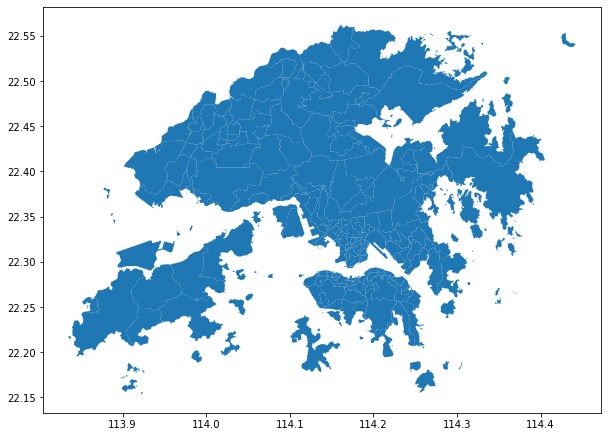

In [32]:
fig_4326, axis_4326 = plt.subplots(1, 1, figsize=(10, 8))
HK_4326.plot(ax = axis_4326)
plt.show()